#### Problem Statement:

#### Data Set Information:
    This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


#### Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

#### load libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn

#### load the dataset

In [3]:
df=pd.read_csv('temp_forecast.csv')

## Step-1 Descriptive Analysis

In [3]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
df.shape

(7752, 25)

In [5]:
dup_df=df[df.duplicated()]
dup_df.shape

(0, 25)

In [6]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [7]:
round(df.isnull().sum()/df.shape[0]*100,2).astype(str)+"%"

station             0.03%
Date                0.03%
Present_Tmax         0.9%
Present_Tmin         0.9%
LDAPS_RHmin         0.97%
LDAPS_RHmax         0.97%
LDAPS_Tmax_lapse    0.97%
LDAPS_Tmin_lapse    0.97%
LDAPS_WS            0.97%
LDAPS_LH            0.97%
LDAPS_CC1           0.97%
LDAPS_CC2           0.97%
LDAPS_CC3           0.97%
LDAPS_CC4           0.97%
LDAPS_PPT1          0.97%
LDAPS_PPT2          0.97%
LDAPS_PPT3          0.97%
LDAPS_PPT4          0.97%
lat                  0.0%
lon                  0.0%
DEM                  0.0%
Slope                0.0%
Solar radiation      0.0%
Next_Tmax           0.35%
Next_Tmin           0.35%
dtype: object

We will drop null values as they constitute very small part of the dataset in the further steps.

In [9]:
round(df.isin([' ']).sum()/df.shape[0]*100,2).astype(str)+"%"

station             0.0%
Date                0.0%
Present_Tmax        0.0%
Present_Tmin        0.0%
LDAPS_RHmin         0.0%
LDAPS_RHmax         0.0%
LDAPS_Tmax_lapse    0.0%
LDAPS_Tmin_lapse    0.0%
LDAPS_WS            0.0%
LDAPS_LH            0.0%
LDAPS_CC1           0.0%
LDAPS_CC2           0.0%
LDAPS_CC3           0.0%
LDAPS_CC4           0.0%
LDAPS_PPT1          0.0%
LDAPS_PPT2          0.0%
LDAPS_PPT3          0.0%
LDAPS_PPT4          0.0%
lat                 0.0%
lon                 0.0%
DEM                 0.0%
Slope               0.0%
Solar radiation     0.0%
Next_Tmax           0.0%
Next_Tmin           0.0%
dtype: object

In [10]:
round(df.isin(['?']).sum()/df.shape[0]*100,2).astype(str)+'%'

station             0.0%
Date                0.0%
Present_Tmax        0.0%
Present_Tmin        0.0%
LDAPS_RHmin         0.0%
LDAPS_RHmax         0.0%
LDAPS_Tmax_lapse    0.0%
LDAPS_Tmin_lapse    0.0%
LDAPS_WS            0.0%
LDAPS_LH            0.0%
LDAPS_CC1           0.0%
LDAPS_CC2           0.0%
LDAPS_CC3           0.0%
LDAPS_CC4           0.0%
LDAPS_PPT1          0.0%
LDAPS_PPT2          0.0%
LDAPS_PPT3          0.0%
LDAPS_PPT4          0.0%
lat                 0.0%
lon                 0.0%
DEM                 0.0%
Slope               0.0%
Solar radiation     0.0%
Next_Tmax           0.0%
Next_Tmin           0.0%
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


## Step-2 Exploratoty Data Analysis

We will create a **copy for the exploratory analysis purpose.**

In [15]:
df_copy=pd.DataFrame(data=df)

In [17]:
list_cols=df_copy.columns

In [19]:
list_cols[0]

'station'

#### 1.'station'

In [20]:
df_copy['station'].value_counts()

25.0    310
12.0    310
2.0     310
3.0     310
4.0     310
5.0     310
6.0     310
7.0     310
8.0     310
9.0     310
10.0    310
11.0    310
13.0    310
23.0    310
14.0    310
15.0    310
16.0    310
18.0    310
20.0    310
22.0    310
24.0    310
17.0    310
19.0    310
21.0    310
1.0     310
Name: station, dtype: int64

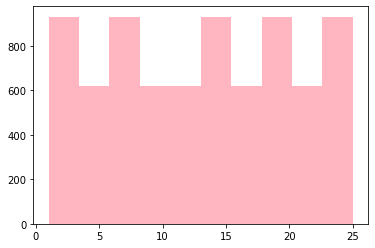

In [21]:
plt.hist(df_copy['station'],color='lightpink')
plt.show()

In [22]:
list_cols[1]

'Date'

#### 2.'Date'

In [24]:
df_copy['Date']=pd.to_datetime(df_copy['Date'])
df_copy['Day']=df_copy['Date'].dt.day
df_copy['Month']=df_copy['Date'].dt.month

In [25]:
df_copy['Day'].value_counts()

7.0     1500
8.0     1500
30.0     375
24.0     250
13.0     250
14.0     250
15.0     250
16.0     250
18.0     250
20.0     250
22.0     250
26.0     250
27.0     250
28.0     250
29.0     250
17.0     250
19.0     250
21.0     250
23.0     250
25.0     250
31.0     125
Name: Day, dtype: int64

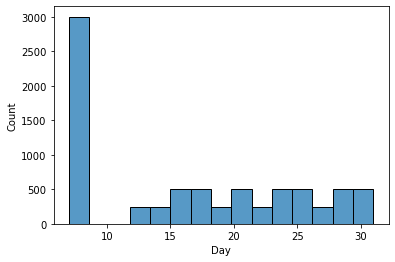

In [26]:
sn.histplot(df_copy['Day'])
plt.show()

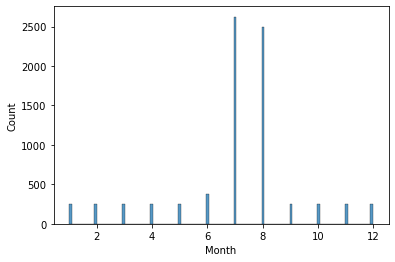

In [27]:
sn.histplot(df_copy['Month'])
plt.show()

In [28]:
list_cols[2]

'Present_Tmax'

#### 3.'Present_Tmax'

In [29]:
df_copy['Present_Tmax'].value_counts()

31.4    112
29.4    111
29.1    108
29.7    107
30.6    105
       ... 
36.4      1
20.7      1
20.4      1
20.3      1
21.2      1
Name: Present_Tmax, Length: 167, dtype: int64

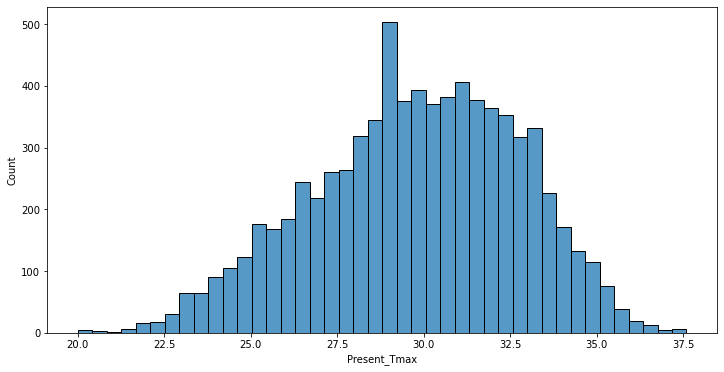

In [31]:
plt.figure(figsize=(12,6))
sn.histplot(df_copy['Present_Tmax'])
plt.show()

In [32]:
list_cols[3]

'Present_Tmin'

#### 4.'Present_Tmin'

In [33]:
df_copy['Present_Tmin'].value_counts()

24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.5      1
15.0      1
13.6      1
14.2      1
29.6      1
Name: Present_Tmin, Length: 155, dtype: int64

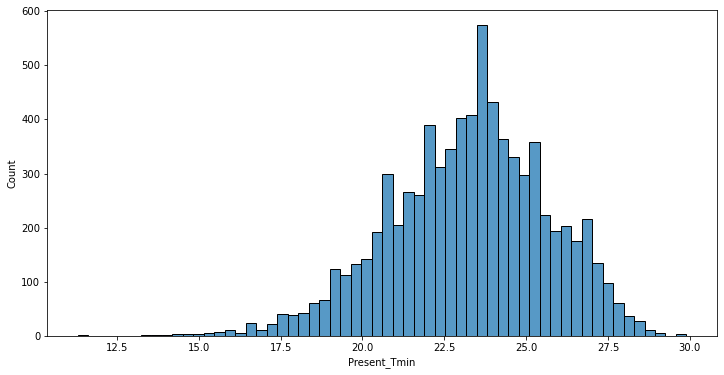

In [34]:
plt.figure(figsize=(12,6))
sn.histplot(df_copy['Present_Tmin'])
plt.show()

In [35]:
list_cols[4]

'LDAPS_RHmin'

#### 5.'LDAPS_RHmin'

In [36]:
df_copy['LDAPS_RHmin'].value_counts()

51.810596    2
71.658089    2
77.030350    2
98.524734    2
19.794666    2
            ..
44.005089    1
58.655628    1
58.761993    1
42.186558    1
71.359451    1
Name: LDAPS_RHmin, Length: 7672, dtype: int64

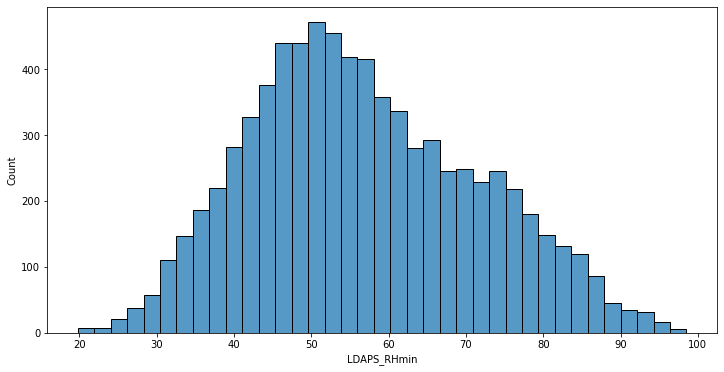

In [38]:
plt.figure(figsize=(12,6))
sn.histplot(df_copy['LDAPS_RHmin'])
plt.show()

In [39]:
list_cols[5]

'LDAPS_RHmax'

#### 6.'LDAPS_RHmax'

In [40]:
df_copy['LDAPS_RHmax'].value_counts()

58.936283    2
96.525200    2
91.776146    2
88.876610    2
92.531029    2
            ..
83.450928    1
91.301826    1
82.626305    1
80.657700    1
83.073624    1
Name: LDAPS_RHmax, Length: 7664, dtype: int64

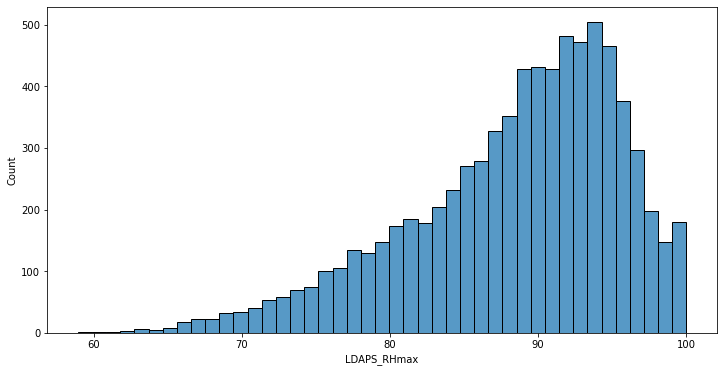

In [41]:
plt.figure(figsize=(12,6))
sn.histplot(df_copy['LDAPS_RHmax'])
plt.show()

In [42]:
list_cols[6]

'LDAPS_Tmax_lapse'

#### 7.'LDAPS_Tmax_lapse'

In [43]:
df_copy['LDAPS_Tmax_lapse'].value_counts()

17.624954    2
38.542255    2
29.521661    1
32.201413    1
23.508736    1
            ..
30.066939    1
29.181508    1
33.268739    1
29.969835    1
27.149571    1
Name: LDAPS_Tmax_lapse, Length: 7675, dtype: int64

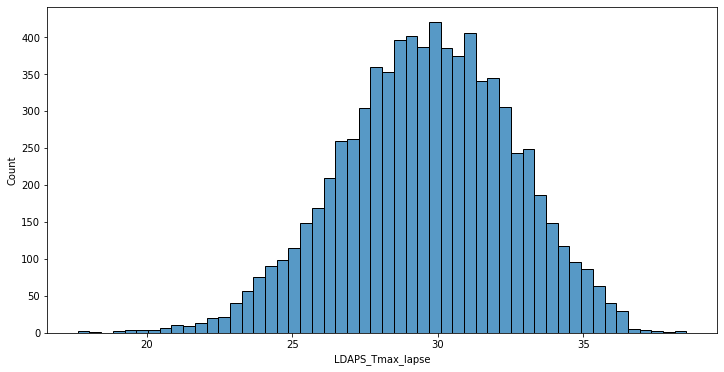

In [44]:
plt.figure(figsize=(12,6))
sn.histplot(df_copy['LDAPS_Tmax_lapse'])
plt.show()

In [45]:
list_cols[7]

'LDAPS_Tmin_lapse'

#### 8.'LDAPS_Tmin_lapse'

In [46]:
df_copy['LDAPS_Tmin_lapse'].value_counts()

14.272646    2
29.619342    2
21.797430    1
25.681776    1
24.143785    1
            ..
22.562532    1
20.332596    1
27.344587    1
25.081030    1
23.197572    1
Name: LDAPS_Tmin_lapse, Length: 7675, dtype: int64

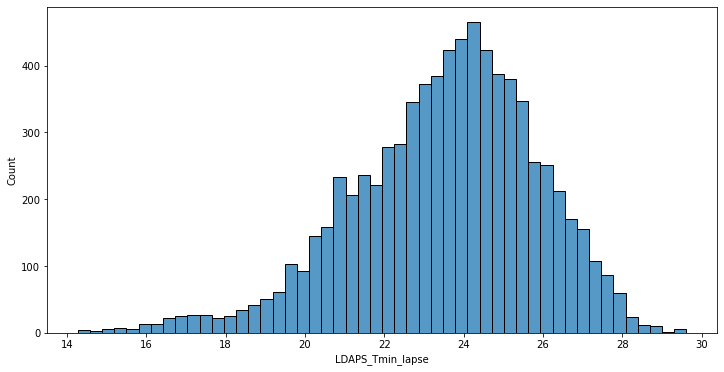

In [47]:
plt.figure(figsize=(12,6))
sn.histplot(df_copy['LDAPS_Tmin_lapse'])
plt.show()

In [48]:
list_cols[8]

'LDAPS_WS'

#### 9.'LDAPS_WS'

In [49]:
df_copy['LDAPS_WS'].value_counts()

2.882580     2
21.857621    2
4.633030     1
10.157699    1
5.145232     1
            ..
4.818516     1
13.419236    1
10.352374    1
5.738173     1
8.112974     1
Name: LDAPS_WS, Length: 7675, dtype: int64

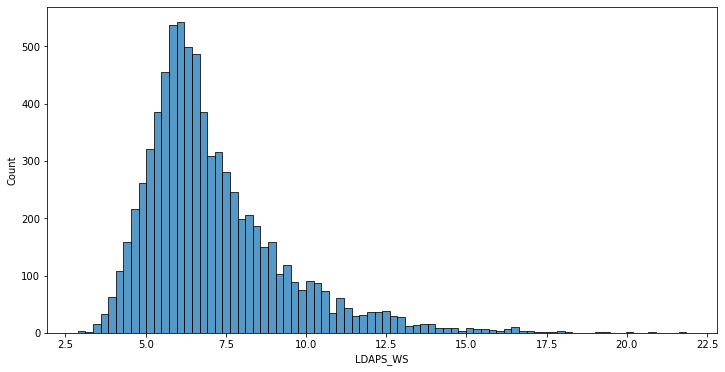

In [50]:
plt.figure(figsize=(12,6))
sn.histplot(df_copy['LDAPS_WS'])
plt.show()

In [51]:
list_cols[9]

'LDAPS_LH'

#### 10.'LDAPS_LH'

In [52]:
df_copy['LDAPS_LH'].value_counts()

-13.603212     2
 213.414006    2
 31.292903     1
 52.898936     1
 58.594891     1
              ..
 10.853051     1
 20.780082     1
 79.438871     1
 78.099351     1
 48.865865     1
Name: LDAPS_LH, Length: 7675, dtype: int64

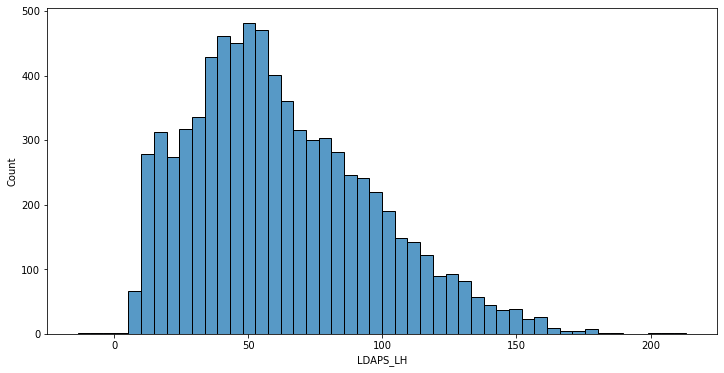

In [54]:
plt.figure(figsize=(12,6))
sn.histplot(df_copy['LDAPS_LH'])
plt.show()

In [55]:
list_cols[10]

'LDAPS_CC1'

#### 11.'LDAPS_CC1'

In [56]:
df_copy['LDAPS_CC1'].value_counts()

0.000000    108
0.967277      2
0.081400      1
0.271888      1
0.051230      1
           ... 
0.001239      1
0.494226      1
0.104894      1
0.281367      1
0.315165      1
Name: LDAPS_CC1, Length: 7569, dtype: int64

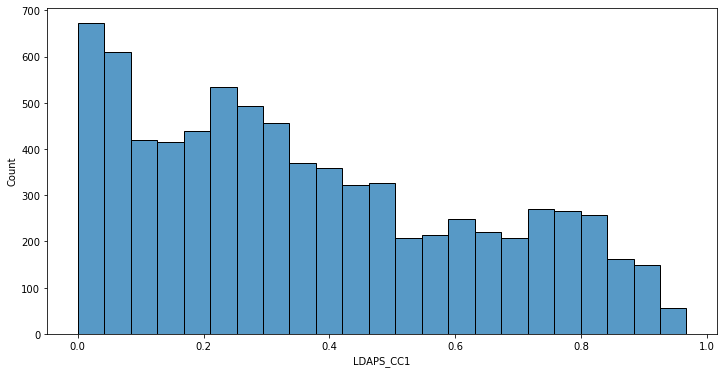

In [57]:
plt.figure(figsize=(12,6))
sn.histplot(df_copy['LDAPS_CC1'])
plt.show()

In [58]:
list_cols[11]

'LDAPS_CC2'

#### 12.'LDAPS_CC2'

In [59]:
df_copy['LDAPS_CC2'].value_counts()

0.000000    95
0.968353     2
0.546027     1
0.209168     1
0.183111     1
            ..
0.079483     1
0.103516     1
0.332022     1
0.009617     1
0.372664     1
Name: LDAPS_CC2, Length: 7582, dtype: int64

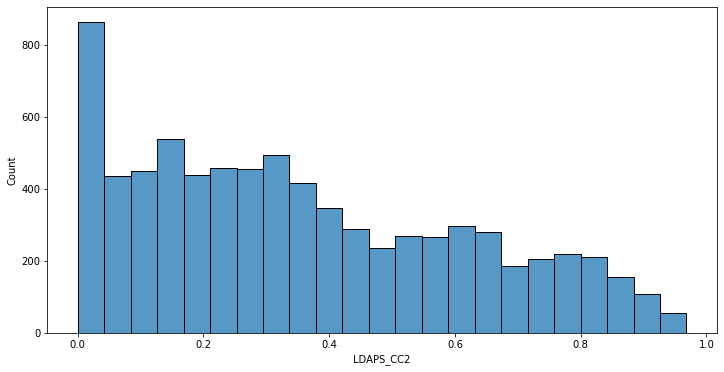

In [60]:
plt.figure(figsize=(12,6))
sn.histplot(df_copy['LDAPS_CC2'])
plt.show()

In [61]:
list_cols[12]

'LDAPS_CC3'

#### 13.'LDAPS_CC3'

In [62]:
df_copy['LDAPS_CC3'].value_counts()

0.000000e+00    76
5.810000e-07     2
8.680560e-04     2
9.837888e-01     2
2.824154e-01     1
                ..
1.931737e-01     1
1.583397e-01     1
1.600219e-01     1
1.120541e-02     1
7.488603e-02     1
Name: LDAPS_CC3, Length: 7599, dtype: int64

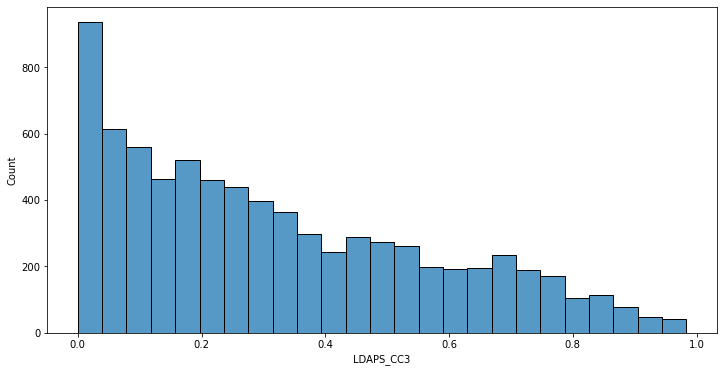

In [64]:
plt.figure(figsize=(12,6))
sn.histplot(df_copy['LDAPS_CC3'])
plt.show()

In [65]:
list_cols[13]

'LDAPS_CC4'

#### 14.'LDAPS_CC4'

In [66]:
df_copy['LDAPS_CC4'].value_counts()

0.000000    137
0.002604      7
0.005208      3
0.001736      3
0.373025      2
           ... 
0.699422      1
0.748660      1
0.228682      1
0.760407      1
0.306225      1
Name: LDAPS_CC4, Length: 7524, dtype: int64

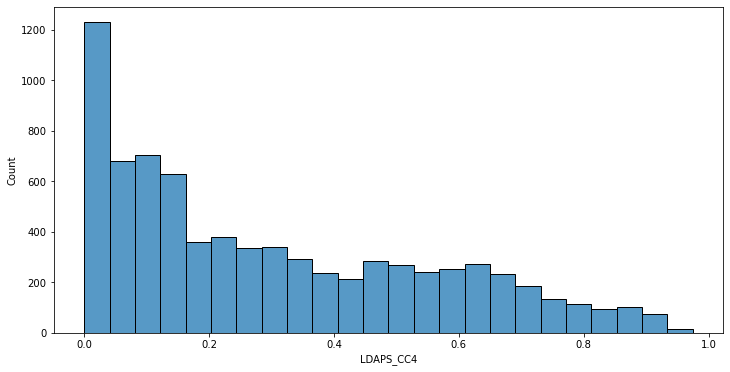

In [68]:
plt.figure(figsize=(12,6))
sn.histplot(df_copy['LDAPS_CC4'])
plt.show()

In [69]:
list_cols[14]

'LDAPS_PPT1'

#### 15.'LDAPS_PPT1'

In [74]:
df_copy['LDAPS_PPT1'].max()

23.70154408

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


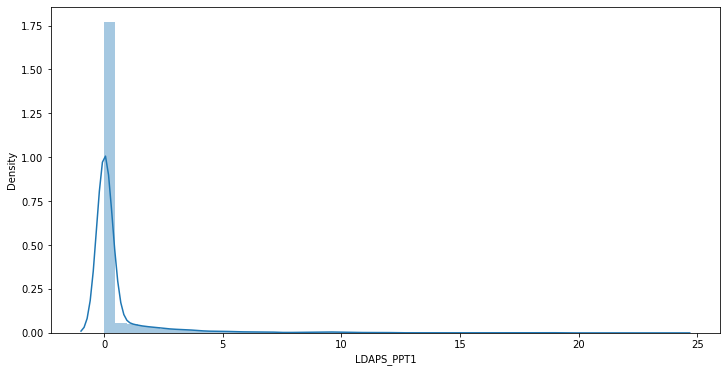

In [76]:
plt.figure(figsize=(12,6))
sn.distplot(df_copy['LDAPS_PPT1'])
plt.show()

In [73]:
list_cols[15]

'LDAPS_PPT2'

#### 16.'LDAPS_PPT2'

In [77]:
df_copy['LDAPS_PPT2'].value_counts()

0.000000     5151
0.001953        7
0.000040        3
0.000781        3
21.621661       2
             ... 
0.085236        1
0.041993        1
0.002633        1
0.039292        1
0.109433        1
Name: LDAPS_PPT2, Length: 2510, dtype: int64

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


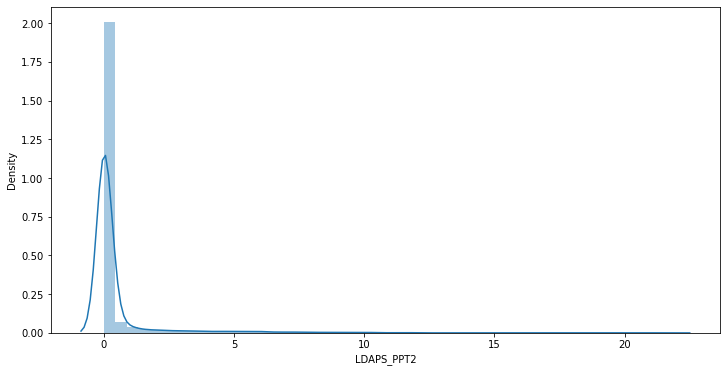

In [78]:
plt.figure(figsize=(12,6))
sn.distplot(df_copy['LDAPS_PPT2'])
plt.show()

In [79]:
list_cols[16]

'LDAPS_PPT3'

#### 17.'LDAPS_PPT3'

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


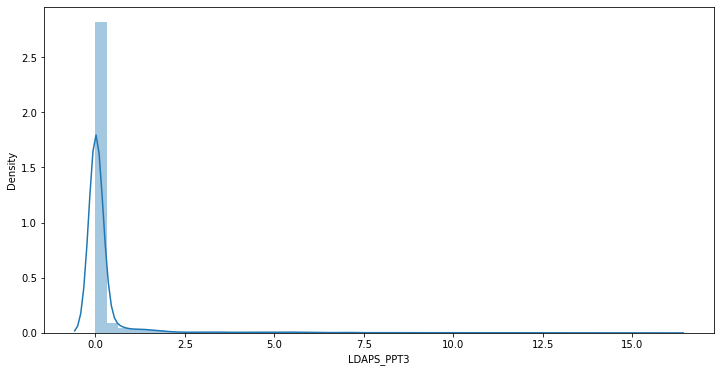

In [80]:
plt.figure(figsize=(12,6))
sn.distplot(df_copy['LDAPS_PPT3'])
plt.show()

In [82]:
list_cols[17]

'LDAPS_PPT4'

#### 18.'LDAPS_PPT4'

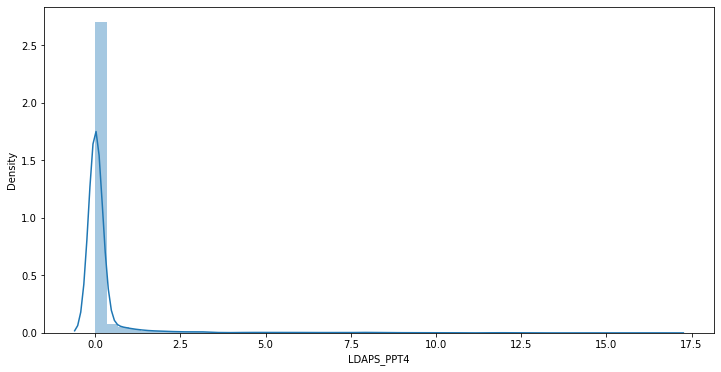

In [83]:
plt.figure(figsize=(12,6))
sn.distplot(df_copy['LDAPS_PPT4'])
plt.show()

In [86]:
list_cols[18]

'lat'

#### 19.'lat'

In [87]:
df_copy['lat'].value_counts()

37.5776    1240
37.5507    1240
37.5237     620
37.4697     620
37.5102     620
37.6181     620
37.4967     620
37.6046     620
37.5372     620
37.6450     311
37.4562     311
37.4832     310
Name: lat, dtype: int64

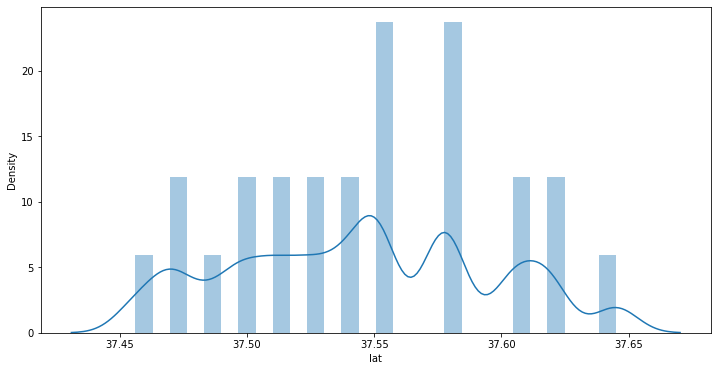

In [94]:
plt.figure(figsize=(12,6))
sn.distplot(df_copy['lat'])
plt.show()

In [89]:
list_cols[19]

'lon'

#### 20.'lon'

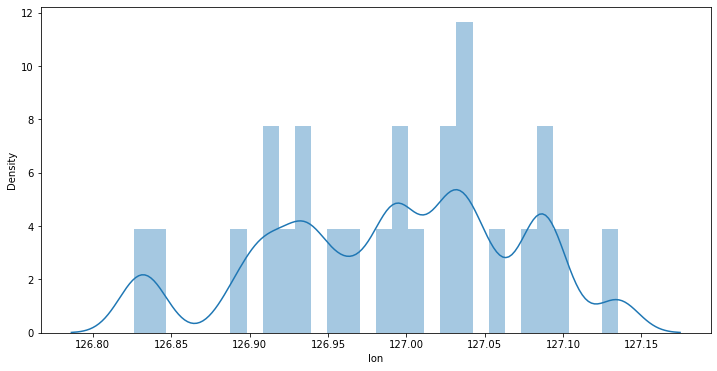

In [93]:
plt.figure(figsize=(12,6))
sn.distplot(df_copy['lon'])
plt.show()

In [95]:
list_cols[20]

'DEM'

#### 21.'DEM'

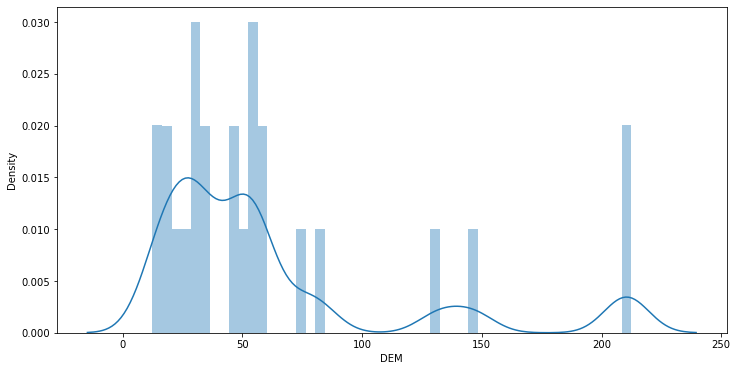

In [97]:
plt.figure(figsize=(12,6))
sn.distplot(df_copy['DEM'])
plt.show()

In [98]:
list_cols[21]

'Slope'

#### 22.'Slope'

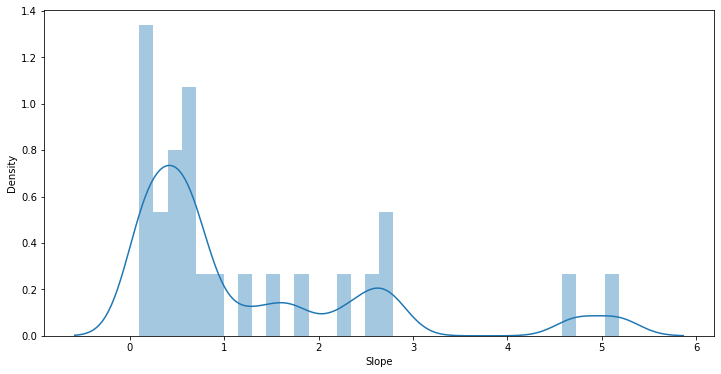

In [100]:
plt.figure(figsize=(12,6))
sn.distplot(df_copy['Slope'])
plt.show()

In [101]:
list_cols[22]

'Solar radiation'

#### 23.'Solar radiation'

In [102]:
df_copy['Solar radiation'].value_counts()

5818.526855    5
4926.958008    5
4671.646484    5
5652.810547    5
5161.941406    5
              ..
4405.562500    1
4403.272949    1
4431.057129    1
4395.165527    1
4423.769531    1
Name: Solar radiation, Length: 1575, dtype: int64

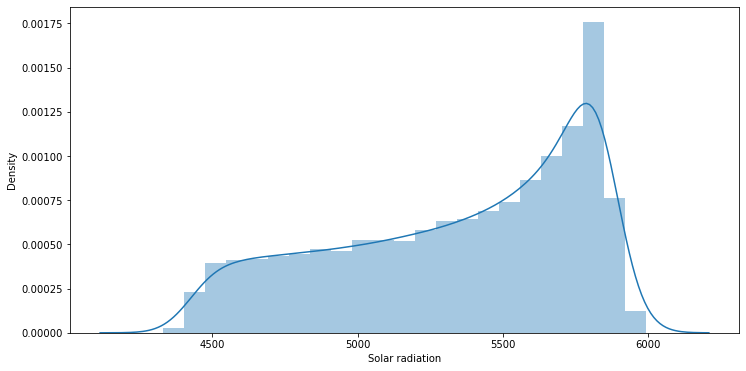

In [103]:
plt.figure(figsize=(12,6))
sn.distplot(df_copy['Solar radiation'])
plt.show()

In [104]:
list_cols[23]

'Next_Tmax'

#### 24.'Next_Tmax'

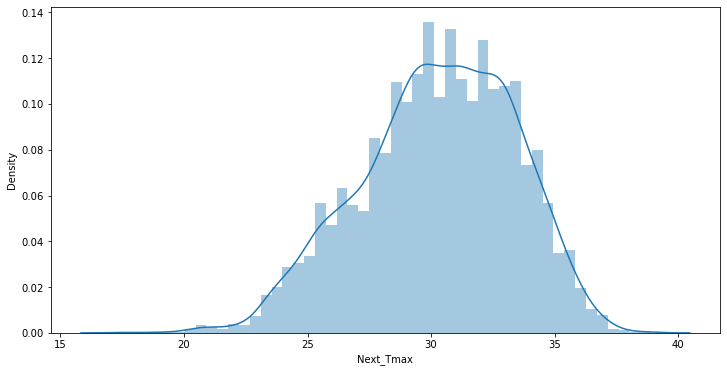

In [106]:
plt.figure(figsize=(12,6))
sn.distplot(df_copy['Next_Tmax'])
plt.show()

In [107]:
list_cols[24]

'Next_Tmin'

#### 25.'Next_Tmin'

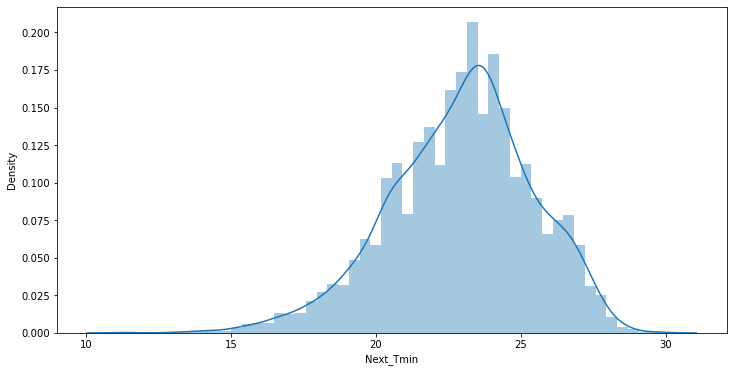

In [108]:
plt.figure(figsize=(12,6))
sn.distplot(df_copy['Next_Tmin'])
plt.show()

## Step-3 Data Preprocessing

In [4]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


#### missing values

In [6]:
round(df.isnull().sum()/df.shape[0]*100,2).astype(str)+"%"

station             0.03%
Date                0.03%
Present_Tmax         0.9%
Present_Tmin         0.9%
LDAPS_RHmin         0.97%
LDAPS_RHmax         0.97%
LDAPS_Tmax_lapse    0.97%
LDAPS_Tmin_lapse    0.97%
LDAPS_WS            0.97%
LDAPS_LH            0.97%
LDAPS_CC1           0.97%
LDAPS_CC2           0.97%
LDAPS_CC3           0.97%
LDAPS_CC4           0.97%
LDAPS_PPT1          0.97%
LDAPS_PPT2          0.97%
LDAPS_PPT3          0.97%
LDAPS_PPT4          0.97%
lat                  0.0%
lon                  0.0%
DEM                  0.0%
Slope                0.0%
Solar radiation      0.0%
Next_Tmax           0.35%
Next_Tmin           0.35%
dtype: object

In [7]:
df.dropna(inplace=True)

#### Outlier detection

In [9]:
numerical_cols=[]
numerical_cols.clear()
for column in df:
    if df[column].dtypes!='object':
        numerical_cols.append(column)

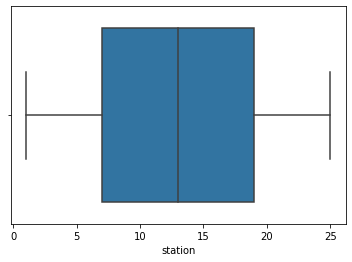

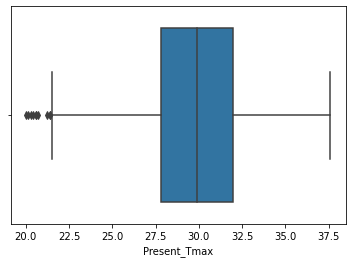

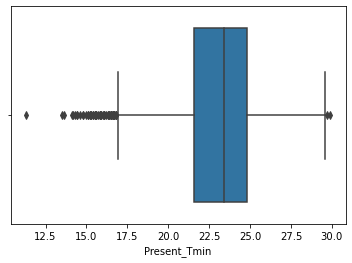

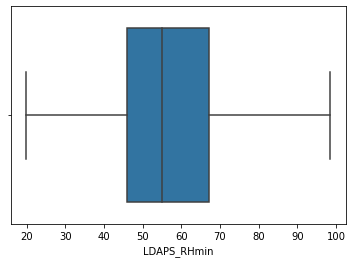

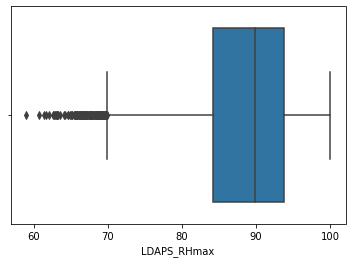

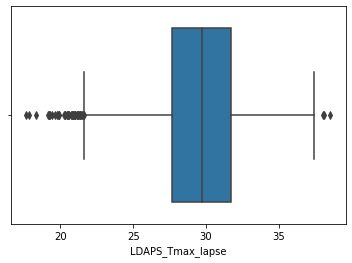

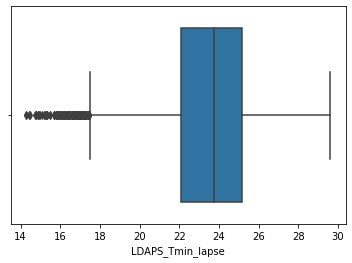

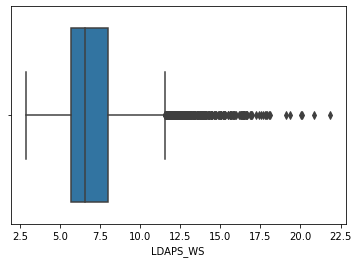

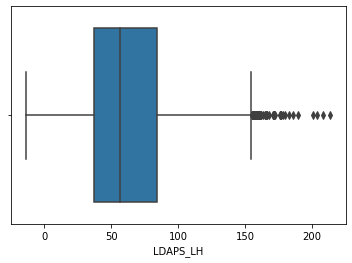

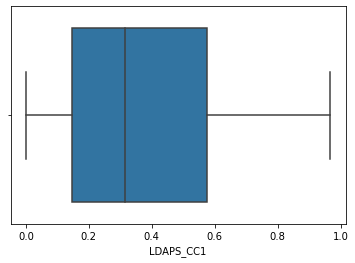

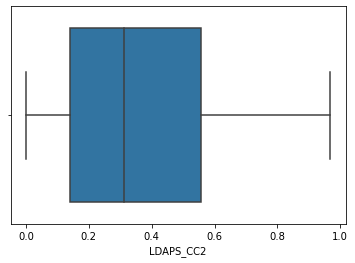

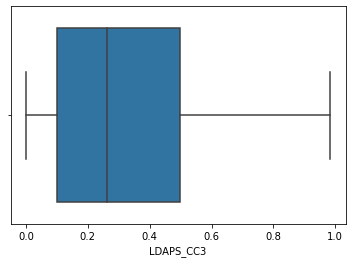

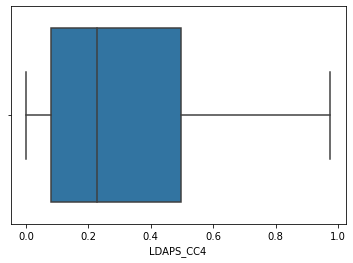

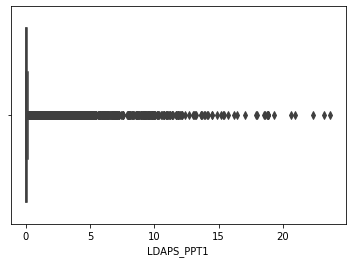

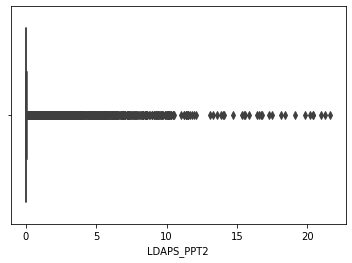

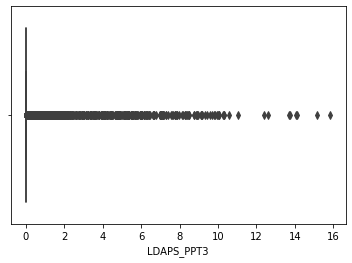

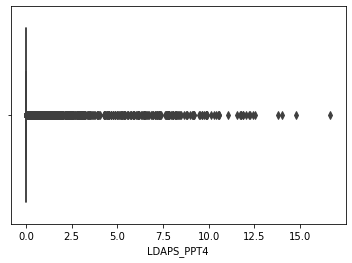

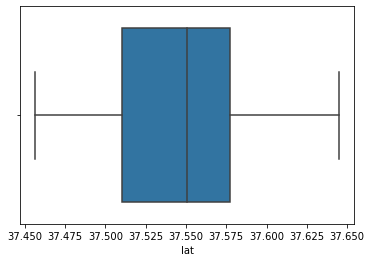

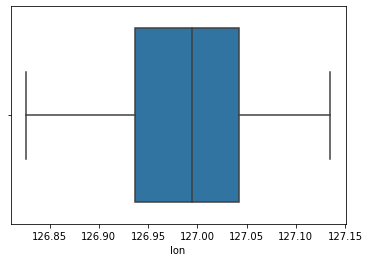

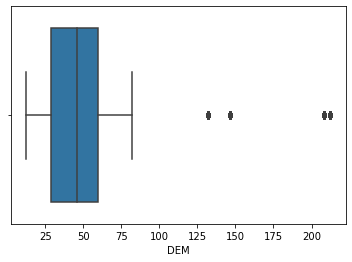

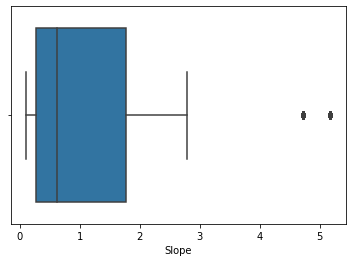

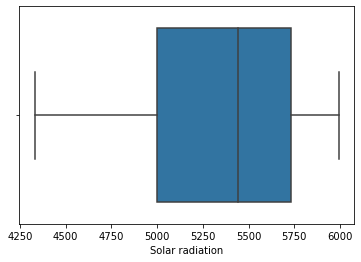

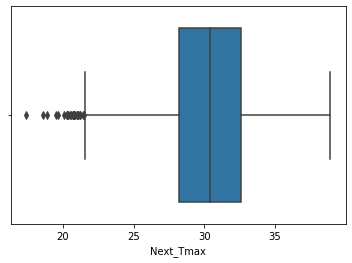

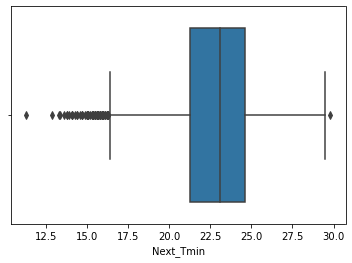

In [10]:
for column in numerical_cols:
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax=sn.boxplot(df[column])
    ax.set_xlabel(column)
    plt.show()

#### skewness check 

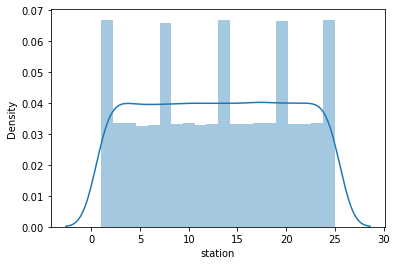

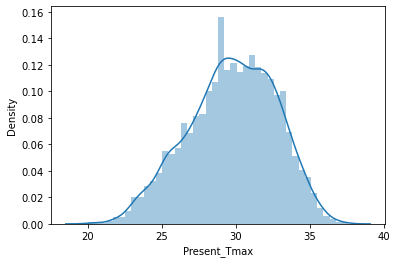

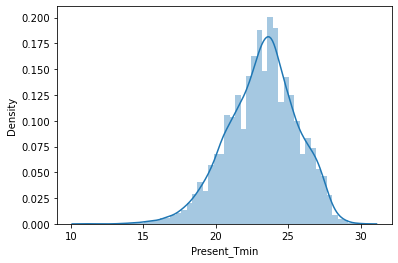

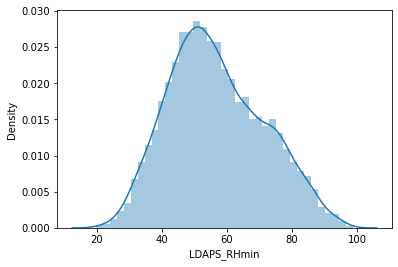

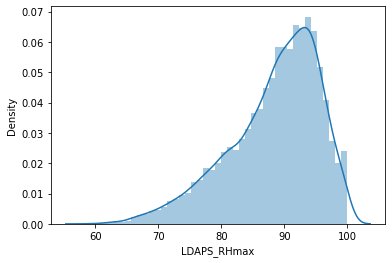

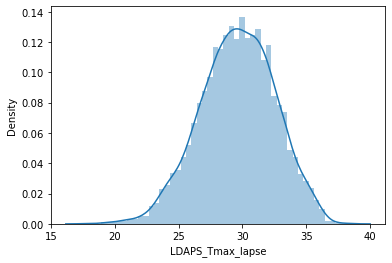

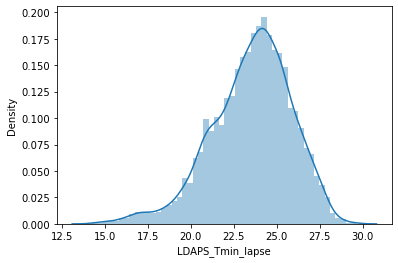

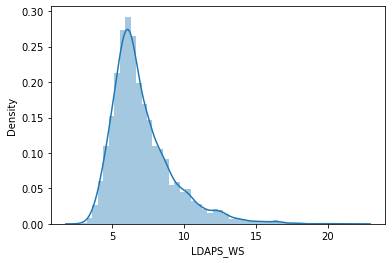

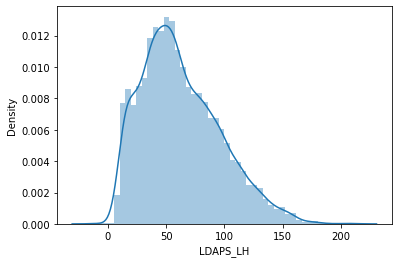

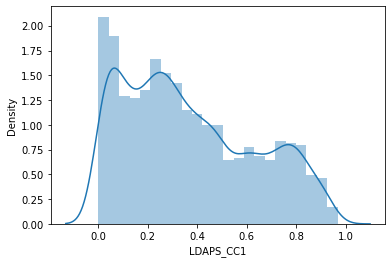

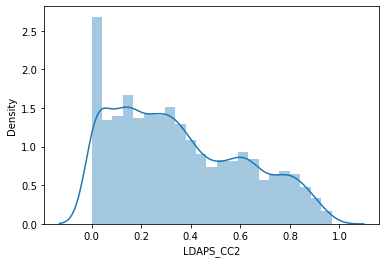

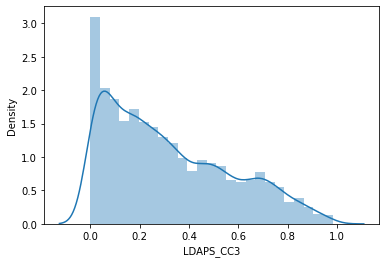

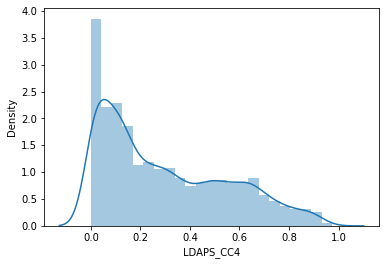

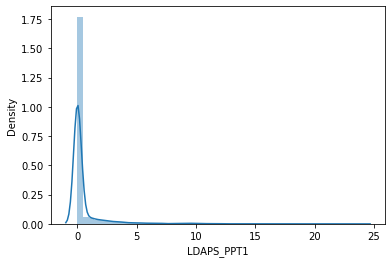

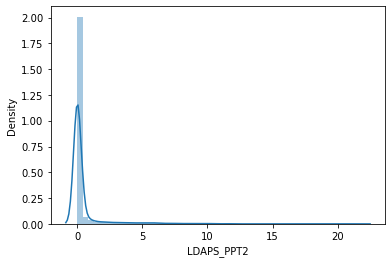

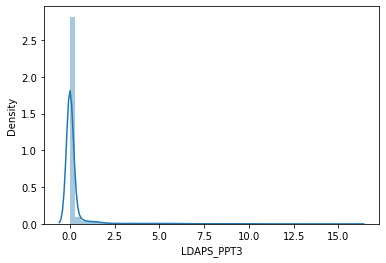

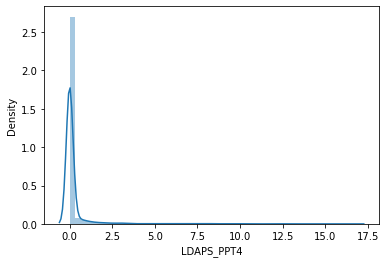

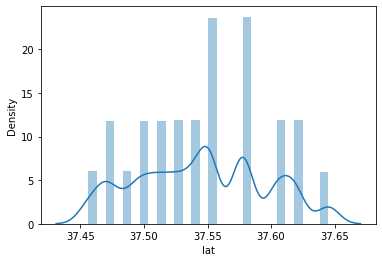

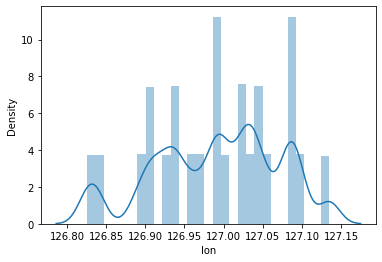

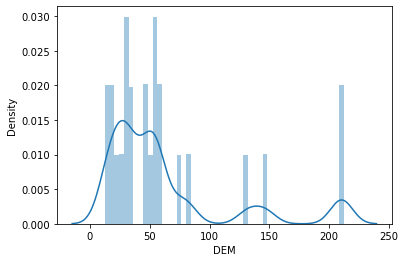

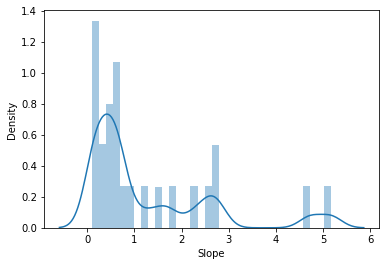

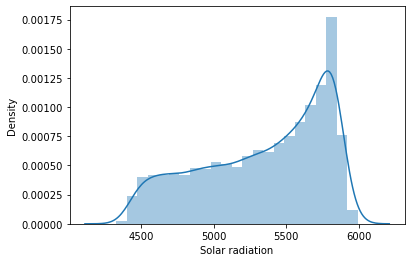

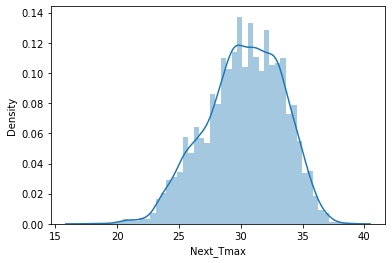

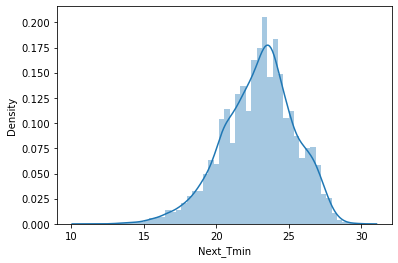

In [11]:
for column in numerical_cols:
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax=sn.distplot(df[column])
    ax.set_xlabel(column)
    plt.show()

#### feature extraction

In [12]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [13]:
date_features=['Date']
for i in date_features:
    df[str(i)+' day']=pd.to_datetime(df[i]).dt.day
    df[str(i)+' month']=pd.to_datetime(df[i]).dt.month

In [14]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Date day,Date month
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6


In [15]:
df.drop('Date',axis=1,inplace=True)

In [16]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Date day,Date month
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6


#### Label encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [18]:
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col]=le.fit_transform(df[col])